# imports 

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# 회귀모형 소개

`-` model1 (simple) : $y_i = w_0 + w_1 x_i + ϵ_{i} = 2.5 + 4x_i + ϵ_{i}, \quad i=1,2,\dots n$

`-` model (multiple) : $\bf{y} = \bf{XW}+ϵ$

* $y = \begin {bmatrix} y_1 \\ y_2 \\ .. y_n   \end{bmatrix},\quad \bf{X} =\begin{bmatrix}1 & x_1 \\ 1 & x_2 \\ ... & ... \\ 1 & x_n \\ \end{bmatrix}, \quad \bf{W} = \begin{bmatrix} 2.5 \\ 4 \end{bmatrix}, \quad ϵ = \begin{bmatrix}ɛ_1 \\ ... \\ ɛ_n \end{bmatrix}$ 

## 회귀모형에서 데이터 생성

In [15]:
_rtn = torch.randn(100).sort()

In [18]:
_rtn

torch.return_types.sort(
values=tensor([-3.1367e+00, -2.8208e+00, -2.2292e+00, -2.1231e+00, -2.0937e+00,
        -1.9074e+00, -1.5389e+00, -1.4720e+00, -1.3928e+00, -1.3714e+00,
        -1.3338e+00, -1.2976e+00, -1.2710e+00, -1.0745e+00, -9.2089e-01,
        -9.0436e-01, -8.6659e-01, -8.5472e-01, -8.1530e-01, -8.0666e-01,
        -7.9050e-01, -7.2011e-01, -6.5759e-01, -6.4015e-01, -6.3165e-01,
        -5.8250e-01, -5.6724e-01, -5.6494e-01, -5.5067e-01, -5.3365e-01,
        -5.3033e-01, -5.2203e-01, -5.0332e-01, -3.8757e-01, -3.8734e-01,
        -3.6441e-01, -3.5983e-01, -3.4966e-01, -3.4702e-01, -3.2707e-01,
        -3.2038e-01, -3.1154e-01, -3.0962e-01, -3.0318e-01, -2.9651e-01,
        -2.1545e-01, -2.0184e-01, -1.4594e-01, -1.1142e-01, -9.6427e-02,
        -9.5620e-02, -5.7341e-02, -4.1936e-02, -2.8048e-02, -6.9670e-04,
         9.0079e-03,  2.5418e-02,  7.3700e-02,  1.1160e-01,  1.4730e-01,
         2.4064e-01,  2.5896e-01,  2.8077e-01,  2.8109e-01,  2.8217e-01,
         2.8941e-01

In [19]:
_rtn[0] ## 사실상 x, _rtn[0]은 인덱스 값이다.

tensor([-3.1367e+00, -2.8208e+00, -2.2292e+00, -2.1231e+00, -2.0937e+00,
        -1.9074e+00, -1.5389e+00, -1.4720e+00, -1.3928e+00, -1.3714e+00,
        -1.3338e+00, -1.2976e+00, -1.2710e+00, -1.0745e+00, -9.2089e-01,
        -9.0436e-01, -8.6659e-01, -8.5472e-01, -8.1530e-01, -8.0666e-01,
        -7.9050e-01, -7.2011e-01, -6.5759e-01, -6.4015e-01, -6.3165e-01,
        -5.8250e-01, -5.6724e-01, -5.6494e-01, -5.5067e-01, -5.3365e-01,
        -5.3033e-01, -5.2203e-01, -5.0332e-01, -3.8757e-01, -3.8734e-01,
        -3.6441e-01, -3.5983e-01, -3.4966e-01, -3.4702e-01, -3.2707e-01,
        -3.2038e-01, -3.1154e-01, -3.0962e-01, -3.0318e-01, -2.9651e-01,
        -2.1545e-01, -2.0184e-01, -1.4594e-01, -1.1142e-01, -9.6427e-02,
        -9.5620e-02, -5.7341e-02, -4.1936e-02, -2.8048e-02, -6.9670e-04,
         9.0079e-03,  2.5418e-02,  7.3700e-02,  1.1160e-01,  1.4730e-01,
         2.4064e-01,  2.5896e-01,  2.8077e-01,  2.8109e-01,  2.8217e-01,
         2.8941e-01,  3.2667e-01,  3.3933e-01,  4.0

In [20]:
torch.manual_seed(202150256)
ones= torch.ones(100)
x,_ = torch.randn(100).sort()
X = torch.stack([ones,x]).T # = torch.stack([ones,x],axis=1)
W = torch.tensor([2.5,4])
ϵ = torch.randn(100)*0.5
y = X@W + ϵ

In [21]:
X[:5],y[:5]

(tensor([[ 1.0000, -2.8720],
         [ 1.0000, -2.6928],
         [ 1.0000, -2.6554],
         [ 1.0000, -2.1535],
         [ 1.0000, -1.6357]]),
 tensor([-9.9523, -7.7394, -7.3931, -6.6678, -4.0281]))

In [22]:
X.shape, y.shape

(torch.Size([100, 2]), torch.Size([100]))

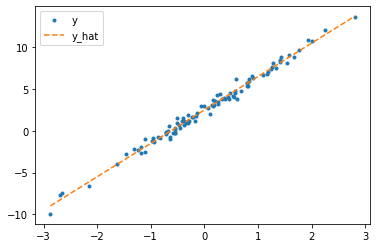

In [23]:
plt.plot(x,y,".")
plt.plot(x,2.5+4*x,"--")
plt.legend(["y","y_hat"])

## 회귀모형에서 학습이란?

`-` 파란점만 주어진 경우, 주황색 점선( $\hat{y}$ )를 추정하는 것 $\to$ 즉, 주어진 데이터로 $\hat{\bf{W}}=\begin{bmatrix} \hat{w_0} \\ \hat{w_1} \end{bmatrix}를 최대한 \begin{bmatrix} 2.5 \\ 4 \end{bmatrix}$와 비슷하게 찾는 것

`-` 위 그림을 보고 **적당한** 추세선을 찾는것!

`-` 시도 1 : $(\hat{w_0},\hat{w_1}) = (-5,10)$ 을 선택하여 선을 그려보고 적당한지 판단.

* $\hat{y} = -5+10x_{i}$

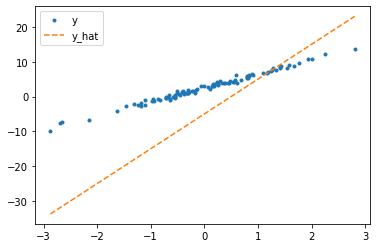

In [24]:
plt.plot(x,y,".")
plt.plot(x,-5+10*x,"--")
plt.legend(["y","y_hat"])

* 벡터표현으로 주황색 점선을 계산

In [25]:
What = torch.tensor([-5.0, 10.0])

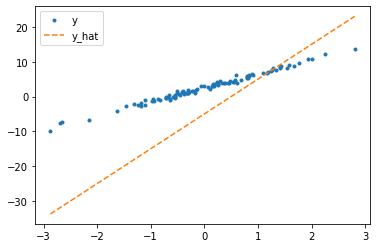

In [26]:
plt.plot(x,y,".")
plt.plot(x,X@What,"--")
plt.legend(["y","y_hat"])

* 적합결과 적합한 회귀식은 아니나. `loss`값을 계산하여 갱신할 수 있는 토대를 만들었다.

### 파라미터 학습

* 이론적으로 추론 : 회귀분석시간에 배운것


$$\bf{W} = (X^{\top}X)^{-1}X^{\top}y$$

* 컴퓨터의 반복계산을 이용하여 추론 (손실함수 + 경사하강법) 

`-` 전략

1. step 1 : 아무 점선이나 그어본다.

2. step 2 : step1에서 그은 점선보다 더 좋은 점선으로 바꾼다.

3. step 3 : step 1,2 를 반복한다.

`-` step 1

* $\hat {w_0} = -5, \hat{w_1} = 10$으로 설정하고 임의의 선을 그어보자.

In [27]:
What = torch.tensor([-5.0,10.0],requires_grad=True) ## 손실함수를 미분하기 위해
What

tensor([-5., 10.], requires_grad=True)

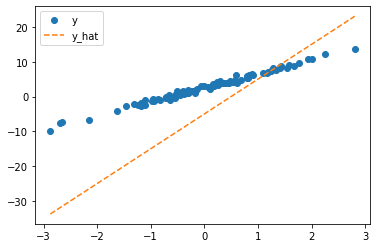

In [28]:
plt.plot(x,y,'o')
plt.plot(x,X@What.detach(), '--') 
plt.legend(["y","y_hat"])

`-` step 2

* loss function 도입


$$loss = \sum_{i=1}^{n} (y_i -\hat{y_i})^2 = (\bf{y-\hat{y}})^{\top}(\bf{y-\hat{y}}) $$

In [32]:
loss = torch.sum((y-X@What)**2)
loss

tensor(9210.4121, grad_fn=<SumBackward0>)

* 갱신
  * 마이너스의 의미 : 기울기의 부호를 보고 반대방향으로 움직여라
  * $\frac{\partial}{\partial \bf{W}} loss$ : 기울기의 절대값 크기와 비례하여 움직이는 정도를 조정하라.
  * $\alpha$ : $alpha$값이 클 수록 전체적으로 빠르게 움직, 즉 큼직큼직하게 $\bf{W}$ 를 갱신한다.

$$\bf {W_{t+1}} = \bf {W_t} - \alpha \times \frac {\partial}{\partial \bf{W}}  loss$$

* $loss$를 줄이는 방법 $\to$ 경사하강법

In [33]:
loss.backward()

* `loss.backward()` : loss를 `requires_grad=True`를 가진텐서로 미분하라.

In [34]:
What.grad

tensor([-1449.6279,  1244.9608])

* $(w_0, w_1)=(-5,10)$ 에서의 $loss(w_0,w_1)$의 순간기울기가 $(-1449.6279,  1244.9608)$ 이라는 의미.

`-` (확인 1) : `loss.backward()`가 미분을 잘 계산해 주는 것이 맞는가 검산해보자. 손계산으로 검산

$$\frac{\partial}{\partial \bf{W}} loss = -2\bf{X^{\top}y} + 2 \bf{X^{\top}XW}$$

In [35]:
-2 * X.T @ y + 2 * X.T @ X @ What

tensor([-1449.6281,  1244.9608], grad_fn=<AddBackward0>)

`-` (확인 2) : 편미분을 구현하여 검증

* $\frac{\partial}{\partial w_0} loss(w_0, w_1) \approx  \frac{loss(w_0+h,w_1) - loss(w_0,w_1)}{h}$

* $\frac{\partial}{\partial w_1} loss(w_0, w_1) \approx  \frac{loss(w_0,w_1+h) - loss(w_0,w_1)}{h}$

In [37]:
_loss_fn = lambda w0,w1 : torch.sum((y-w0-w1*x)**2)

* $h=0.001, w_0 =-5, w_1 *10$

In [39]:
h = 0.001

(_loss_fn(-5+h,10) - _loss_fn(-5,10))/h, (_loss_fn(-5,10+h) - _loss_fn(-5,10))/h

(tensor(-1449.2186), tensor(1246.0938))

* 약간의 오차가 있지만 얼추 비슷 $\to$ 잘 계산했다는 의미!

* $\bf {W_{t+1}} = \bf{W_{t}}$를 계산

In [41]:
alpha = 0.001

Wbefore = What.data
Wafter = What.data - alpha * What.grad
Wbefore, Wafter

(tensor([-5., 10.]), tensor([-3.5504,  8.7550]))

`-` 1회 갱신 후 시각화

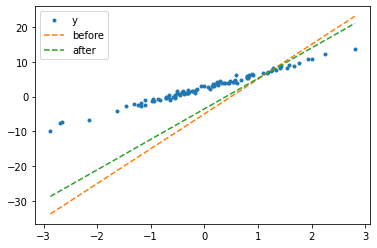

In [44]:
plt.plot(x,y,".")
plt.plot(x,X@Wbefore,"--")
plt.plot(x,X@Wafter,"--")
plt.legend(["y","before","after"])

`-` step 3

* 학습

In [63]:
What =  torch.tensor([-5.0, 10.0],requires_grad= True)
What

alpha  = 0.001

for epoch in range(30) : 
    yhat = X@What
    loss  = torch.sum((y-yhat)**2)
    loss.backward() # loss 미분
    What.data = What.data - alpha * What.grad
    What.grad = None ## 미분한 기울기 값을 다시 재설정

In [69]:
What

tensor([2.5137, 4.0065], requires_grad=True)

In [68]:
What.data

tensor([2.5137, 4.0065])

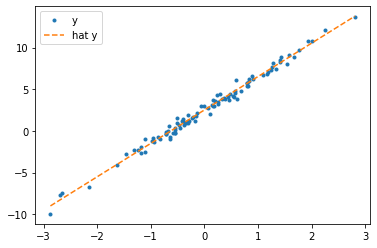

In [70]:
plt.plot(x,y,".")
plt.plot(x,X@What.data,"--")
plt.legend(["y","hat y"])

### 학습과정 모니터링

In [79]:
loss_history = []
yhat_history = []
What_history = []

What = torch.tensor([-5.0, 10.0],requires_grad=True)
alpha = 0.001

for epoc in range(30) :
    yhat = X@What
    yhat_history.append(yhat.data.tolist())
    loss = torch.sum((y-yhat)**2)
    loss_history.append(loss.item())
    loss.backward()
    What.data = What.data - alpha * What.grad
    What_history.append(What.data.tolist())
    What.grad = None

`-` $\hat y,\bf{W} , loss$ (epoch=3, epoch=10, epoch=15) 관찰 

Text(0.5, 1.0, 'loss')

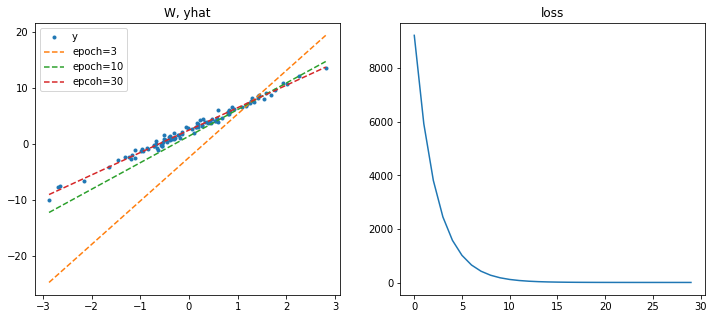

In [97]:
fig,axs = plt.subplots(1,2,figsize=(12,5))
ax1 = axs[0]
ax2 = axs[1]

ax1.plot(x,y,".")
ax1.plot(x,yhat_history[2],"--")
ax1.plot(x,yhat_history[9],"--")
ax1.plot(x,yhat_history[29],"--")
ax1.legend(["y","epoch=3","epoch=10","epcoh=30"])
ax1.set_title("W, yhat")
ax2.plot(loss_history)
ax2.set_title("loss")

### animation으로 시각화

Text(0.5, 0.92, 'loss')

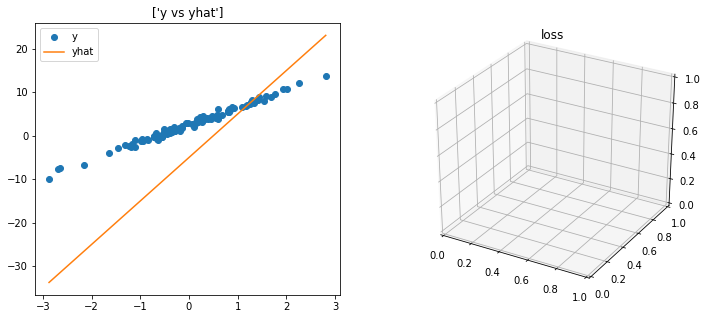

In [105]:
from matplotlib import animation

plt.rcParams['figure.figsize'] = (12,5)
plt.rcParams["animation.html"] = "jshtml" 

fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2, projection='3d')

ax1.plot(x,y,'o')
line, = ax1.plot(x,yhat_history[0]) # 나중에 애니메이션 할때 필요
ax1.legend(["y","yhat"])
ax1.set_title(["y vs yhat"])
ax2.set_title("loss")

In [106]:
_w0 = np.arange(-6, 11, 0.5) ## 파란색곡면을 그리는 코드 (시작) 
_w1 = np.arange(-6, 11, 0.5)
w1,w0 = np.meshgrid(_w1,_w0)
lss=w0*0
for i in range(len(_w0)):
    for j in range(len(_w1)):
        lss[i,j]=torch.sum((y-_w0[i]-_w1[j]*x)**2)
ax2.plot_surface(w0, w1, lss, rstride=1, cstride=1, color='b',alpha=0.35) ## 파란색곡면을 그리는 코드(끝) 
ax2.azim = 40  ## 3d plot의 view 조절 
ax2.dist = 8   ## 3d plot의 view 조절 
ax2.elev = 5   ## 3d plot의 view 조절 

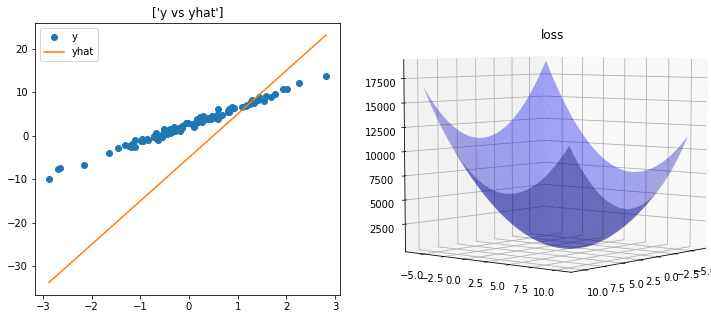

In [107]:
fig

In [112]:
ax2.scatter(2.5,4,torch.sum((y-2.5-4*x)**2),s=200,color='red',marker='*') ## 최소점을 표시하는 코드 (붉은색 별) 
ax2.scatter(What_history[0][0],What_history[0][1],loss_history[0],color='blue') ## 업데이트되는 What을 표시하는 점 (파란색 동그라미) 

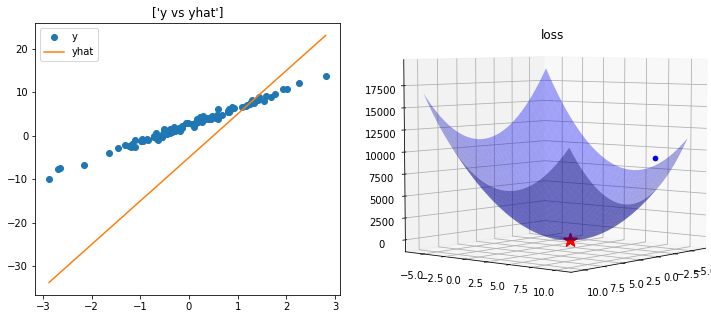

In [113]:
fig

In [116]:
def animate(epoc):
    line.set_ydata(yhat_history[epoc])
    ax2.scatter(What_history[epoc][0],What_history[epoc][1],loss_history[epoc],color='blue')
    return line

ani = animation.FuncAnimation(fig, animate, frames=30)
plt.close()
ani

Output hidden; open in https://colab.research.google.com to view.

`-` 함수로 구현

In [117]:
def show_lrpr(data,history):
    x,y = data 
    loss_history,yhat_history,What_history = history 
    
    fig = plt.figure()
    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2, projection='3d')

    ## ax1: 왼쪽그림 
    ax1.plot(x,y,'o')
    line, = ax1.plot(x,yhat_history[0]) # 나중에 애니메이션 할때 필요
    ax1.legend(["y","yhat"])
    ax1.set_title("y vs yhat")
    ax2.set_title("loss")
    ## ax2: 오른쪽그림 
    _w0 = np.arange(-6, 11, 0.5) ## 파란색곡면을 그리는 코드 (시작) 
    _w1 = np.arange(-6, 11, 0.5)
    w1,w0 = np.meshgrid(_w1,_w0)
    lss=w0*0
    for i in range(len(_w0)):
        for j in range(len(_w1)):
            lss[i,j]=torch.sum((y-_w0[i]-_w1[j]*x)**2)
    ax2.plot_surface(w0, w1, lss, rstride=1, cstride=1, color='b',alpha=0.35) ## 파란색곡면을 그리는 코드(끝) 
    ax2.scatter(2.5,4,torch.sum((y-2.5-4*x)**2),s=200,color='red',marker='*') ## 최소점을 표시하는 코드 (붉은색 별) 
    ax2.scatter(What_history[0][0],What_history[0][1],loss_history[0],color='b') ## 업데이트되는 What을 표시하는 점 (파란색 동그라미) 
    ax2.azim = 40  ## 3d plot의 view 조절 
    ax2.dist = 8   ## 3d plot의 view 조절 
    ax2.elev = 5   ## 3d plot의 view 조절 

    def animate(epoc):
        line.set_ydata(yhat_history[epoc])
        ax2.scatter(np.array(What_history)[epoc,0],np.array(What_history)[epoc,1],loss_history[epoc],color='grey')
        return line

    ani = animation.FuncAnimation(fig, animate, frames=30)
    plt.close()
    return ani

In [119]:
show_lrpr([x,y],[loss_history,yhat_history,What_history])

Output hidden; open in https://colab.research.google.com to view.

## 학습률에 따른 효율

### (1) 0.001

In [120]:
loss_history = [] # 기록하고 싶은것 1  
yhat_history = [] # 기록하고 싶은것 2 
What_history = [] # 기록하고 싶은것 3 


What= torch.tensor([-5.0,10.0],requires_grad=True)
alpha=0.0001 
for epoc in range(30): 
    yhat=X@What ; yhat_history.append(yhat.data.tolist())
    loss=torch.sum((y-yhat)**2); loss_history.append(loss.item())
    loss.backward() 
    What.data = What.data-alpha * What.grad; What_history.append(What.data.tolist())
    What.grad=None

In [121]:
show_lrpr([x,y],[loss_history,yhat_history,What_history])

Output hidden; open in https://colab.research.google.com to view.

* 비효율적 최적값으로 너무 느리게 수렴, epoch가 더필요

### (2) 0.0083 

In [123]:
loss_history = [] # 기록하고 싶은것 1  
yhat_history = [] # 기록하고 싶은것 2 
What_history = [] # 기록하고 싶은것 3 


What= torch.tensor([-5.0,10.0],requires_grad=True)
alpha=0.0083 
for epoc in range(30): 
    yhat=X@What ; yhat_history.append(yhat.data.tolist())
    loss=torch.sum((y-yhat)**2); loss_history.append(loss.item())
    loss.backward() 
    What.data = What.data-alpha * What.grad; What_history.append(What.data.tolist())
    What.grad=None

show_lrpr([x,y],[loss_history,yhat_history,What_history])

Output hidden; open in https://colab.research.google.com to view.

* epoch에 따른 변화율이 너무 크다 $\to$ 약간 작으면 좋을것 같음

### (3) 0.0085

In [125]:
loss_history = [] # 기록하고 싶은것 1  
yhat_history = [] # 기록하고 싶은것 2 
What_history = [] # 기록하고 싶은것 3 


What= torch.tensor([-5.0,10.0],requires_grad=True)
alpha=0.0085 
for epoc in range(30): 
    yhat=X@What ; yhat_history.append(yhat.data.tolist())
    loss=torch.sum((y-yhat)**2); loss_history.append(loss.item())
    loss.backward() 
    What.data = What.data-alpha * What.grad; What_history.append(What.data.tolist())
    What.grad=None

show_lrpr([x,y],[loss_history,yhat_history,What_history])

Output hidden; open in https://colab.research.google.com to view.

* 최적값으로 수렴을 하는듯 하면서 약간 벗어난다. 만약 epoch이 늘어나면 수렴값에서 떨어질 가능성이 높다...

### (4) 0.01

In [126]:
loss_history = [] # 기록하고 싶은것 1  
yhat_history = [] # 기록하고 싶은것 2 
What_history = [] # 기록하고 싶은것 3 


What= torch.tensor([-5.0,10.0],requires_grad=True)
alpha = 0.01 
for epoc in range(30): 
    yhat=X@What ; yhat_history.append(yhat.data.tolist())
    loss=torch.sum((y-yhat)**2); loss_history.append(loss.item())
    loss.backward() 
    What.data = What.data-alpha * What.grad; What_history.append(What.data.tolist())
    What.grad=None

show_lrpr([x,y],[loss_history,yhat_history,What_history])

* 기울기가 무한대로 터지는 경우가 발생

* summary : 적절한 $\alpha$ 값을 구하는것이 중요하다!